In [ ]:
# logistic regression

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
#from lr_utils import load_dataset

from sklearn.linear_model import LogisticRegressionCV


%matplotlib inline

In [109]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [110]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()

In [142]:
# reshape and normalize the data
X_train = np.reshape(train_set_x_orig, (train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3],-1))
Y_train = train_set_y_orig
X_train = X_train/255
m1      = X_train.shape[1]

X_test  = np.reshape(test_set_x_orig,(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3],-1))
X_test  = X_test/255
m2      = X_test.shape[1]
Y_test  = test_set_y_orig

In [112]:
def Sigmoid(x):
    return 1/(1+np.exp(-x))

In [95]:
def Compute_cost(Y,A):
    m = A.shape[1]
    J = -np.mean((1-Y)*np.log(1-A) + Y*np.log(A), axis=1)   
    
    
    return J

In [162]:
def Init_parameters(X,y):
    dim_x = X.shape[0]
    
    #W = np.zeros((1,dim_x+1))
    W  = np.random.randn(1,dim_x+1)*.001
    return W

In [98]:
def Update_parameters(W,dW,alpha):
    W = W -alpha*dW
    return W

In [143]:
def Forward_Pass(W,X):
    m      = X.shape[1]
    X_prim = np.concatenate((np.ones((1,m)),X),axis=0)
    Z      = np.dot(W,X_prim)
    A      = Sigmoid(Z)
    
    return A

In [144]:
def Backward_Pass(A,Y,X):
    m     = X.shape[1]
    X_bar = np.concatenate((np.ones((1,m)),X),axis = 0)    
    dW    = np.dot((A-Y),X_bar.T)/m
    return dW

In [145]:
#w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
#grads, cost = propagate(w, b, X, Y)

W_test2 = np.array([[2.],[1.],[2.]]).T
X_test2 = np.array([[1.,2.,-1.],[3.,4.,-3.2]])
Y_test2 = np.array([[1,0,1]])

A_test2   = Forward_Pass(W_test2,X_test2)
dW_test2  = Backward_Pass(A_test2,Y_test2,X_test2)


print("dW test :" + str(dW_test2))

J_test2   = Compute_cost(Y_test2,A_test2)

print("J_test :" + str(J_test2))


dW test :[[1.45557814e-03 9.98456015e-01 2.39507239e+00]]
J_test :[5.80154532]


In [150]:
# predictions verify

w_a = np.array([[-.3],[0.1124579],[0.23106775]]).T
X_a = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
np.round(Forward_Pass(w_a,X_a))


array([[1., 1., 0.]])

In [153]:
def Model_logistic_regression(Num_iterations,alpha,X_train,Y_train,X_test,Y_test):
    
    W = Init_parameters(X_train,Y_train)
    costs       = []
    iterations  = []
    for num_it in range(Num_iterations): 
        A  = Forward_Pass(W,X_train)
        dW = Backward_Pass(A,Y_train,X_train) 
        W  = Update_parameters(W,dW,alpha)
    
    
        if ((num_it%100) == 0): 
            J = Compute_cost(Y_train,A)
            print("Cost after the "+ str(num_it) + "  (th) iteration :" + str(J))
            iterations.append(num_it)
            costs.append(J)
    
    #Predictions/accuracy on train and test
    
    A          = Forward_Pass(W,X_train)
    Pred_train = np.round(A)
    Acc_train  = 100 - 100*np.mean(np.abs(Pred_train - Y_train))

    
    A_test     = Forward_Pass(W,X_test)
    Pred_test  = np.round(A_test)
    Acc_test   = 100 - 100*np.mean(np.abs(Pred_test - Y_test))
    
    
    d = {}
    d["Costs"]          = costs
    d["Iterations"]     = iterations
    d["W"]              = W
    d["Accuracy_train"] = Acc_train
    d["Accuracy_test"]  = Acc_test
    
    
    print("Accuracy train : " + str(Acc_train))
    print("Accuracy test: " + str(Acc_test))

    return d

Cost after the 0  (th) iteration :[0.69010129]
Cost after the 100  (th) iteration :[0.54168587]
Cost after the 200  (th) iteration :[0.68816595]
Cost after the 300  (th) iteration :[0.85868663]
Cost after the 400  (th) iteration :[1.11023759]
Cost after the 500  (th) iteration :[1.14909198]
Cost after the 600  (th) iteration :[1.06217252]
Cost after the 700  (th) iteration :[0.99332188]
Cost after the 800  (th) iteration :[0.93620727]
Cost after the 900  (th) iteration :[0.8865688]
Cost after the 1000  (th) iteration :[0.84185107]
Cost after the 1100  (th) iteration :[0.80060041]
Cost after the 1200  (th) iteration :[0.76199322]
Cost after the 1300  (th) iteration :[0.72554193]
Cost after the 1400  (th) iteration :[0.69093318]
Cost after the 1500  (th) iteration :[0.65794557]
Cost after the 1600  (th) iteration :[0.62640955]
Cost after the 1700  (th) iteration :[0.59618828]
Cost after the 1800  (th) iteration :[0.56716829]
Cost after the 1900  (th) iteration :[0.53925451]
Cost after th

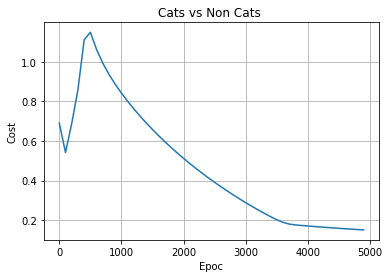

In [163]:
Num_iterations = 5000
alpha          = 0.008
d = Model_logistic_regression(Num_iterations,alpha,X_train,Y_train,X_test,Y_test)



fig, ax = plt.subplots()
ax.plot(d["Iterations"], d["Costs"])

ax.set(xlabel='Epoc', ylabel='Cost',
       title='Cats vs Non Cats ')
ax.grid()   
    